### Zip files are extracted manually

In [19]:
import cupy as np
import time

In [20]:
test_images = './t10k-images.idx3-ubyte'
test_labels = './t10k-labels.idx1-ubyte'
train_images = './train-images.idx3-ubyte'
train_labels = './train-labels.idx1-ubyte'

In [21]:
def read_images(file):
    images = []
    with open(file, 'rb') as f:
        _ = f.read(4)
        total_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        columns = int.from_bytes(f.read(4), 'big')
        total_pixels = rows*columns
        for i in range(total_images):
            image = []
            for j in range(total_pixels):
                pixel = int.from_bytes(f.read(1), 'big')
                image.append(pixel)
            images.append(image)
    return images

In [22]:
X_train = np.array(read_images(train_images), dtype='float32')
print(len(X_train))
print(X_train[0])

60000
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.


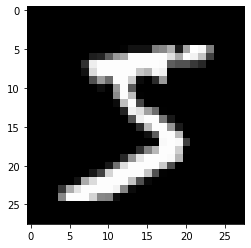

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
number = np.asnumpy(X_train[0])
number = number.reshape((28, 28))
plt.imshow(number, cmap='gray')
plt.show()

In [24]:
def read_labels(file):
    labels = []
    with open(file, 'rb') as f:
        _ = f.read(4)
        total_labels = int.from_bytes(f.read(4), 'big')
        for i in range(total_labels):
            label = int.from_bytes(f.read(1), 'big')
            labels.append(label)
    return labels

In [25]:
Y_train = np.array(read_labels(train_labels), dtype='float32')
print(len(Y_train))
print(Y_train[0])

60000
5.0


In [26]:
X_test = np.array(read_images(test_images), dtype='float32')
len(X_test)

10000

In [27]:
Y_test = np.array(read_labels(test_labels), dtype='float32')
len(Y_test)

10000

### Using sklearn RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier as sk_rf
forest_sk = sk_rf()

In [49]:
start = time.time()
forest_sk.fit(np.asnumpy(X_train), np.asnumpy(Y_train))
end = time.time()
print(f'Time taken by sklearn Random Forest: {end - start} seconds')

Time taken by sklearn Random Forest: 34.19070911407471 seconds


In [50]:
Label_predict_sk = forest_sk.predict(np.asnumpy(X_test))

In [51]:
from sklearn.metrics import accuracy_score as as_sk
print(f'Accuracy Score using sklearn : {as_sk(Label_predict_sk, np.asnumpy(Y_test))}')

Accuracy Score using sklearn : 0.9694


### Using cuml RandomForestClassifier

In [52]:
from cuml import RandomForestClassifier as cu_rf
forest_cu = cu_rf()

In [53]:
start = time.time()
forest_cu.fit(X_train, Y_train)
end = time.time()
print(f'Time taken by cuml Random Forest: {end - start} seconds')

Time taken by cuml Random Forest: 2.35386323928833 seconds


In [54]:
Label_predict_cu = forest_cu.predict(X_test)

In [55]:
from cuml.metrics import accuracy_score as as_cu
print(f'Accuracy Score using cuml: {as_cu(Label_predict_cu, Y_test)}')

Accuracy Score using cuml: 0.9660999774932861
